In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df=pd.read_csv("/content/drive/MyDrive/ai ml/creditcard.csv")

In [7]:
df.shape

(284807, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

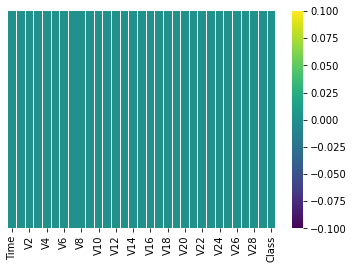

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [10]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# oversampling:to convert minority to majority (we will use)
# undersampling : to convert majority inoto minortiy


In [11]:
# Separate
X=df.drop(columns='Class',axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [12]:
Y=df['Class']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

DEALING WITH IMBALANCING DATA

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
!pip install imblearn

In [15]:
UtoB=SMOTE(sampling_strategy='auto',random_state=35,k_neighbors=4)
X1,Y1=UtoB.fit_resample(X,Y)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test , Y_train ,Y_test = train_test_split(X , Y ,test_size=0.33,random_state=35)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr=LogisticRegression(solver='liblinear')

In [20]:
lr.fit(X_train,Y_train) 

LogisticRegression(solver='liblinear')

In [21]:
from sklearn.metrics import accuracy_score

In [45]:
y_pred=lr.predict(X_test)
score=accuracy_score(Y_test,y_pred)
score

0.9988509049123815

In [28]:
from sklearn.metrics import confusion_matrix

In [46]:
cm=confusion_matrix(Y_test,y_pred,labels=lr.classes_)
cm

array([[93772,    43],
       [   65,   107]])

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

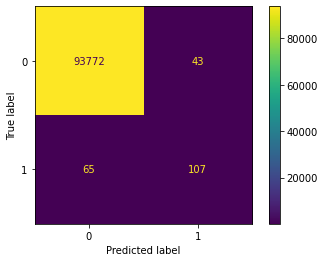

In [47]:
cmd=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
cmd.plot()

In [34]:
from sklearn.metrics import recall_score

In [48]:
print(recall_score(Y_test,y_pred,average='binary'))

0.622093023255814


In [36]:
from sklearn.metrics import precision_score

In [49]:
print(precision_score(Y_test,y_pred,average='binary'))

0.7133333333333334


In [40]:
from sklearn.metrics import f1_score  

In [50]:
print(f1_score(Y_test,y_pred,average='binary'))

0.6645962732919255


In [42]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93815
           1       0.71      0.62      0.66       172

    accuracy                           1.00     93987
   macro avg       0.86      0.81      0.83     93987
weighted avg       1.00      1.00      1.00     93987

